### Aufgaben

Hier werden für den Stichprobenumfang n=100

- zur Wahrscheinlichkeit p=0,26 das 95%-Prognoseintervall,
- zur relativen Häufigkeit h=0,18 das 95%-Konfidenzintervall
- exakt und auch näherungsweise berechnet.

a) Zeigen Sie, dass die Ergebnisse stimmen.

b) Fassen Sie die Bedeutung der gelben und der grünen Strecke in Worte.

c) Elif: "Ich kann der Abbildung die Antwort auf die Frage entnehmen, ob die relative Häufigkeit h=0,18 Anlass bietet, die Wahrscheinlichkeit p=0,26 zu bezweifeln." Erläutern Sie Elifs Aussage und zu welchem Ergebnis Elif kommt.

d) Ümü: "Die Antwort auf Elifs Frage hängt davon ab, ob man exakt oder mit der Näherung arbeitet." Prüfen und kommentieren Sie.

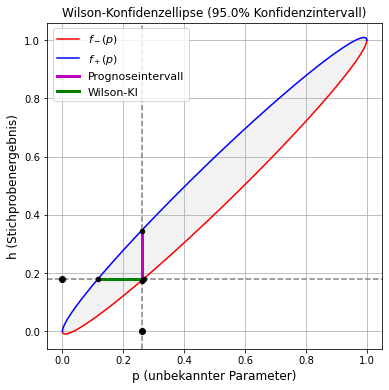

Prognoseintervall für p=0.26: [0.1740, 0.3460]

Wilson-Konfidenzintervall: [0.1170, 0.2667]
Clopper-Pearson-Konfidenzintervall: [0.1103, 0.2695]
Wald-Konfidenzintervall: [0.1047, 0.2553]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta
import warnings

warnings.simplefilter("ignore")

def wilson_ci_bounds(h,n,c):
    a=1/(1+c**2/n)
    term= a*c*np.sqrt(1/(4*n)*(1-a)/a+h*(1-h)/n)
    lower_bound = (1-a)*0.5+a*h-term
    upper_bound = (1-a)*0.5+a*h+term
    return lower_bound, upper_bound

def clopper_pearson_ci(h, n,c):
    alpha = 2 * (1 - norm.cdf(c))  # Berechnung von alpha aus c
    lower_bound = beta.ppf(alpha / 2, h, n - h + 1)
    upper_bound = beta.ppf(1 - alpha / 2, h + 1, n - h)
    return lower_bound, upper_bound

def wald_ci(h, n, c):
    se = np.sqrt(h * (1 - h) / n)
    lower_bound = h - c * se
    upper_bound = h + c * se
    return max(0, lower_bound), min(1, upper_bound)

def plot_confidence_ellipse(h, n, c, p_value):
    p = np.linspace(0, 1, 1000)  # p-Werte als x-Achse
    f1 = p - c * np.sqrt(p * (1 - p) / n)
    f2 = p + c * np.sqrt(p * (1 - p) / n)
    lower_wilson, upper_wilson = wilson_ci_bounds(h, n, c)
    lower_cp, upper_cp = clopper_pearson_ci(h * n, n,c)
    lower_wald, upper_wald = wald_ci(h, n, c)
    
    # Prognoseintervall für gegebenes p
    f1_p = p_value - c * np.sqrt(p_value * (1 - p_value) / n)
    f2_p = p_value + c * np.sqrt(p_value * (1 - p_value) / n)
    
    plt.figure(figsize=(6,6))
    plt.plot(p, f1, 'r', label="$f_-(p)$")
    plt.plot(p, f2, 'b', label="$f_+(p)$")
    plt.axhline(h, color='gray', linestyle='dashed')
    plt.axvline(p_value, color='gray', linestyle='dashed')
    
    # Prognoseintervall
    plt.plot([p_value, p_value], [f1_p, f2_p], 'm-', linewidth=3, label="Prognoseintervall")
    
    # Wilson-Konfidenzintervall (grün)
    plt.plot([lower_wilson, upper_wilson], [h, h], 'g-', linewidth=3, label="Wilson-KI")
    
    # Clopper-Pearson-Konfidenzintervall (orange)
    #plt.plot([lower_cp, upper_cp], [h, h], 'orange', linewidth=2, label="Clopper-Pearson-KI")
    
    # Wald-Konfidenzintervall (blau)
    #plt.plot([lower_wald, upper_wald], [h, h], 'b-', linewidth=2, label="Wald-KI")
    
    plt.scatter([lower_wilson, upper_wilson], [h, h], color='black', s=20, zorder=3)
    plt.scatter([p_value, p_value], [f1_p, f2_p], color='black', s=20, zorder=3)
    #plt.scatter([lower_cp, upper_cp], [h, h], color='red', zorder=3)
    #plt.scatter([lower_wald, upper_wald], [h, h], color='blue', zorder=3)
    plt.fill_between(p, f1, f2, color='gray', alpha=0.1)
    
    # Punkte (0,h) und (p,0)
    plt.scatter([0, p_value], [h, 0], color='black', marker='o', zorder=3)
    
    plt.xlabel("p (unbekannter Parameter)",fontsize=12)
    plt.ylabel("h (Stichprobenergebnis)",fontsize=12)
    plt.legend(fontsize=11)
    plt.title(f"Wilson-Konfidenzellipse ({round(norm.cdf(c) * 2 - 1, 3) * 100}% Konfidenzintervall)",
              fontsize=12)
    plt.grid(True)
    plt.show()
    
    print(f"Prognoseintervall für p={p_value:.2f}: [{f1_p:.4f}, {f2_p:.4f}]")
    print()
    print(f"Wilson-Konfidenzintervall: [{lower_wilson:.4f}, {upper_wilson:.4f}]")
    print(f"Clopper-Pearson-Konfidenzintervall: [{lower_cp:.4f}, {upper_cp:.4f}]")
    print(f"Wald-Konfidenzintervall: [{lower_wald:.4f}, {upper_wald:.4f}]")
   
def plot(c, n, h, p_value):
    plot_confidence_ellipse(h, n, c, p_value)

c=1.96
n=100
h=0.18
p=0.26

plot(c,n,h,p)

# Konfidenzintervalle und deren Visualisierung

Dieses Python-Programm bietet eine interaktive Visualisierung von Konfidenzintervallen für einen unbekannten Parameter \( p \), basierend auf verschiedenen statistischen Methoden. Es zeigt, wie sich die Breite der Konfidenzintervalle verändert, je nach den Eingabewerten für Stichprobengröße, Erfolgsrate und Konfidenzlevel.

---
## 1. Einführung zu Konfidenzintervallen

Ein **Konfidenzintervall** ist ein Bereich von Werten, der den wahren Wert eines Parameters mit einer bestimmten Wahrscheinlichkeit enthält. In diesem Fall versuchen wir, das Konfidenzintervall für einen Parameter \( p \) (z. B. den Anteilswert einer bestimmten Eigenschaft in einer Population) zu berechnen, basierend auf einer Stichprobe. Die Breite des Intervalls hängt von mehreren Faktoren ab, einschließlich der Stichprobengröße und des Konfidenzlevels.

Wir betrachten in diesem Programm drei verschiedene Methoden zur Berechnung von Konfidenzintervallen:
- **Wilson-Konfidenzintervall**
- **Clopper-Pearson-Konfidenzintervall**
- **Wald-Konfidenzintervall**

Jede dieser Methoden hat ihre eigenen Eigenschaften und Vorteile, abhängig von der Situation und der Größe der Stichprobe.

---
## 2. Das Programm

### Bibliotheken

Das Programm verwendet die folgenden Bibliotheken:
- **NumPy**: Zum Berechnen von mathematischen Funktionen.
- **Matplotlib**: Zum Erstellen von Grafiken.
- **SciPy**: Für statistische Berechnungen (z. B. den Clopper-Pearson-Test).
- **import warnings**: Warnmeldung bei Clopper-Pearson verhindern

---
### Funktionen im Programm

#### 2.1 Berechnung der Wilson-Konfidenzintervall-Grenzen

Die Funktion `wilson_ci_bounds` berechnet die unteren und oberen Grenzen des **Wilson-Konfidenzintervalls**. Diese Methode ist besonders nützlich, da sie bei kleinen Stichprobengrößen eine genauere Schätzung liefert als das einfache Wald-Konfidenzintervall.

```python
def wilson_ci_bounds(h, n, c):
    a = 1 / (1 + c**2 / n)
    term = a * c * np.sqrt(1 / (4 * n) * (1 - a) / a + h * (1 - h) / n)
    lower_bound = (1 - a) * 0.5 + a * h - term
    upper_bound = (1 - a) * 0.5 + a * h + term
    return lower_bound, upper_bound
```
---
#### 2.2 Berechnung des Clopper-Pearson-Konfidenzintervalls
Die Funktion clopper_pearson_ci berechnet das Clopper-Pearson-Konfidenzintervall. Diese Methode basiert auf der inversen Beta-Verteilung und ist besonders für kleine Stichprobengrößen geeignet.


```python
def clopper_pearson_ci(h, n, c):
    alpha = 2 * (1 - norm.cdf(c))  # Berechnung von alpha aus c
    lower_bound = beta.ppf(alpha / 2, h, n - h + 1)
    upper_bound = beta.ppf(1 - alpha / 2, h + 1, n - h)
    return lower_bound, upper_bound
```
---
#### 2.3 Berechnung des Wald-Konfidenzintervalls
Die Funktion wald_ci berechnet das Wald-Konfidenzintervall, welches das einfachste der drei Intervalle ist. Es kann jedoch bei kleinen Stichprobengrößen ungenau sein.


```python
def wald_ci(h, n, c):
    se = np.sqrt(h * (1 - h) / n)
    lower_bound = h - c * se
    upper_bound = h + c * se
    return max(0, lower_bound), min(1, upper_bound)
```
---
#### 2.4 Visualisierung der Konfidenzintervalle
Die Funktion plot_confidence_ellipse visualisiert die Konfidenzellipse. Hier werden die verschiedenen Konfidenzintervalle und das Prognoseintervall für einen gegebenen Wert von p
angezeigt. Die Konfidenzintervalle werden mit unterschiedlichen Farben dargestellt, und die Prognose für p wird als vertikale Linie hervorgehoben.

```python
def plot_confidence_ellipse(h, n, c, p_value):
    p = np.linspace(0, 1, 1000)  # p-Werte als x-Achse
    f1 = p - c * np.sqrt(p * (1 - p) / n)
    f2 = p + c * np.sqrt(p * (1 - p) / n)
    lower_wilson, upper_wilson = wilson_ci_bounds(h, n, c)
    lower_cp, upper_cp = clopper_pearson_ci(h * n, n, c)
    lower_wald, upper_wald = wald_ci(h, n, c)
    
    # Prognoseintervall für gegebenes p
    f1_p = p_value - c * np.sqrt(p_value * (1 - p_value) / n)
    f2_p = p_value + c * np.sqrt(p_value * (1 - p_value) / n)
    
    plt.figure(figsize=(6,6))
    plt.plot(p, f1, 'r', label="$f_-(p)$")
    plt.plot(p, f2, 'b', label="$f_+(p)$")
    plt.axhline(h, color='gray', linestyle='dashed')
    plt.axvline(p_value, color='gray', linestyle='dashed')
    
    # Prognoseintervall
    plt.plot([p_value, p_value], [f1_p, f2_p], 'm-', linewidth=3, label="Prognoseintervall")
    
    # Wilson-Konfidenzintervall (grün)
    plt.plot([lower_wilson, upper_wilson], [h, h], 'g-', linewidth=3, label="Wilson-KI")
    
    plt.scatter([lower_wilson, upper_wilson], [h, h], color='black', s=20, zorder=3)
    plt.scatter([p_value, p_value], [f1_p, f2_p], color='black', s=20, zorder=3)
    plt.fill_between(p, f1, f2, color='gray', alpha=0.1)
    
    # Punkte (0,h) und (p,0)
    plt.scatter([0, p_value], [h, 0], color='black', marker='o', zorder=3)
    
    plt.xlabel("p (unbekannter Parameter)", fontsize=14)
    plt.ylabel("h (Stichprobenergebnis)", fontsize=14)
    plt.legend(fontsize=11)
    plt.title(f"Wilson-Konfidenzellipse ({round(norm.cdf(c) * 2 - 1, 3) * 100}% Konfidenzintervall)",
              fontsize=14)
    plt.grid(True)
    plt.show()
    
    print(f"Prognoseintervall für p={p_value:.2f}: [{f1_p:.4f}, {f2_p:.4f}]")
    print()
    print(f"Wilson-Konfidenzintervall: [{lower_wilson:.4f}, {upper_wilson:.4f}]")
    print(f"Clopper-Pearson-Konfidenzintervall: [{lower_cp:.4f}, {upper_cp:.4f}]")
    print(f"Wald-Konfidenzintervall: [{lower_wald:.4f}, {upper_wald:.4f}]")

```
---
#### 4. Fazit
Dieses Programm bietet eine anschauliche Möglichkeit, Konfidenzintervalle für den Parameter 
p unter verschiedenen statistischen Methoden zu untersuchen. Es hilft dabei, zu verstehen, wie sich diese Intervalle je nach Stichprobengröße, Erfolgsrate und Konfidenzlevel ändern.

### Simulation von Konfidenzintervallen - Sicherheitswahrscheinlichkeit

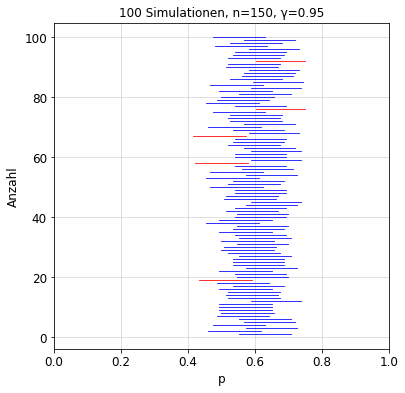

Anzahl der Intervalle, die p nicht überdecken: 5 (5.00%)


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Wilson-Funktion
def wilson(h, n, gamma):
    z = norm.ppf((1 + gamma) / 2)
    z2_n = z**2 / n  # Vorab berechnet
    a = 1 / (1 + z2_n)
    term = a * z * np.sqrt((1 / (4 * n)) * (1 - a) / a + h * (1 - h) / n)
    p_u = (1 - a) * 0.5 + a * h - term
    p_o = (1 - a) * 0.5 + a * h + term
    return p_u, p_o

# Simulationsfunktion
def KISimulationen(n, p, gamma, w):
    plt.figure(figsize=(6, 6))
    treffer = np.random.binomial(n, p, w)  # Vektorisiert
    anz = 0
    
    for i, t in enumerate(treffer, start=1):
        lower_p, upper_p = wilson(t / n, n, gamma)
        color = "blue" if lower_p <= p <= upper_p else "red"
        plt.plot([lower_p, upper_p], [i, i], linewidth=0.8, color=color)
        anz += color == "red"

    plt.title(f"{w} Simulationen, n={n}, γ={gamma}", fontsize=12)
    plt.xlabel("p", fontsize=12)
    plt.ylabel("Anzahl", fontsize=12)
    plt.xticks(fontsize=12)  # Größere Achsenbeschriftung
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.5)
    plt.xlim(0, 1)
    plt.show()

    print(f"Anzahl der Intervalle, die p nicht überdecken: {anz} ({anz / w * 100:.2f}%)")

# Eingabe
n = 150
p = 0.6
gamma = 0.95
anz_KI = 100
KISimulationen(n, p, gamma, anz_KI)

**Erklärung zur Simulation von Konfidenzintervallen mit Python**

### **Einleitung**
Dieses Python-Programm simuliert die Berechnung und Visualisierung von Konfidenzintervallen für eine Binomialverteilung. Es nutzt das Wilson-Konfidenzintervall, um die Wahrscheinlichkeit zu bestimmen, mit der ein geschätzter Parameter (z. B. der Anteil erfolgreicher Treffer) das wahre, unbekannte p abdeckt. Das Programm ist besonders nützlich für ein besseres Verständnis von statistischer Unsicherheit und Zufallsschwankungen.

---

### **1. Import der notwendigen Bibliotheken**
```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
```
**Erklärung:**
- `numpy (np)`: Wird für numerische Berechnungen genutzt, insbesondere für Zufallszahlen.
- `matplotlib.pyplot (plt)`: Dient zur Visualisierung der Simulationsergebnisse.
- `scipy.stats.norm`: Enthält Funktionen für die Normalverteilung, die für das Wilson-Konfidenzintervall benötigt wird.

---

### **2. Definition der Wilson-Konfidenzintervall-Funktion**
```python
def wilson(h, n, gamma):
    z = norm.ppf((1 + gamma) / 2)  # Kritischer Wert der Normalverteilung
    z2_n = z**2 / n  # Vorab berechneter Wert zur Effizienzsteigerung
    a = 1 / (1 + z2_n)
    term = a * z * np.sqrt((1 / (4 * n)) * (1 - a) / a + h * (1 - h) / n)
    p_u = (1 - a) * 0.5 + a * h - term  # Untere Grenze
    p_o = (1 - a) * 0.5 + a * h + term  # Obere Grenze
    return p_u, p_o
```
**Erklärung:**
- Diese Funktion berechnet die Grenzen eines Konfidenzintervalls für einen gegebenen Anteil `h = Treffer/n`, die Stichprobengröße `n` und das Konfidenzniveau `gamma`.
- `norm.ppf((1 + gamma) / 2)`: Gibt den z-Wert zur passenden Wahrscheinlichkeit der Standardnormalverteilung zurück (z.B. für 95% Konfidenz: z ≈ 1.96).
- Die Formel stammt aus der Wilson-Score-Methode, die bei kleinen Stichproben bessere Ergebnisse liefert als die klassische Normalapproximation.

---

### **3. Simulationsfunktion zur Darstellung der Konfidenzintervalle**
```python
def KISimulationen(n, p, gamma, w):
    plt.figure(figsize=(6, 6))  # Größe des Diagramms
    treffer = np.random.binomial(n, p, w)  # Erzeugung von w Binomialverteilungen
    anz = 0  # Zähler für Intervalle, die p nicht enthalten
    
    for i, t in enumerate(treffer, start=1):
        lower_p, upper_p = wilson(t / n, n, gamma)
        color = "blue" if lower_p <= p <= upper_p else "red"
        plt.plot([lower_p, upper_p], [i, i], linewidth=0.8, color=color)
        anz += color == "red"

    plt.title(f"{w} Simulationen, n={n}, γ={gamma}", fontsize=12)
    plt.xlabel("p", fontsize=12)
    plt.ylabel("Anzahl", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.5)
    plt.xlim(0, 1)
    plt.show()

    print(f"Anzahl der Intervalle, die p nicht überdecken: {anz} ({anz / w * 100:.2f}%)")
```
**Erklärung:**
- `np.random.binomial(n, p, w)`: Simuliert `w` Experimente mit `n` Versuchen, wobei jedes mit Wahrscheinlichkeit `p` erfolgreich ist.
- In der Schleife:
  - Berechnung des Konfidenzintervalls für jedes simulierte Treffer-Verhältnis.
  - Farbgebung:
    - **Blau:** Das wahre p liegt im berechneten Intervall.
    - **Rot:** Das wahre p liegt **außerhalb** des Intervalls (Fehlerrate sichtbar).
- Das Diagramm zeigt w Konfidenzintervalle überlagert.
- Am Ende wird die Anzahl der nicht enthaltenden Intervalle ausgegeben.

---

### **4. Aufruf der Simulation**
```python
n = 150
p = 0.6
gamma = 0.95
anz_KI = 100
KISimulationen(n, p, gamma, anz_KI)
```
**Parameter-Erklärung:**
- `n = 150`: Anzahl der Versuche pro Simulation.
- `p = 0.6`: Wahre Erfolgswahrscheinlichkeit.
- `gamma = 0.95`: Konfidenzniveau (95%-Intervall).
- `anz_KI = 100`: Anzahl der durchgeführten Simulationen.

---

### **5. Interpretation der Ergebnisse**
- In der Ausgabe sehen wir **100 Konfidenzintervalle**, die um das geschätzte p herum gezeichnet sind.
- **Blau bedeutet, dass p innerhalb des Intervalls liegt.**
- **Rot bedeutet, dass das wahre p nicht vom Intervall erfasst wurde.**
- Die Fehlerrate sollte ungefähr 5% betragen, da das Konfidenzniveau 95% beträgt.

**Beispielhafte Ausgabe:**
```
Anzahl der Intervalle, die p nicht überdecken: 5 (5.00%)
```
Das bedeutet, dass genau 5 von 100 Intervallen das wahre p nicht enthalten haben – ein realistisches Ergebnis für ein 95%-Konfidenzintervall.

---

### **Fazit**
Dieses Programm zeigt anschaulich, wie Konfidenzintervalle funktionieren und welche Unsicherheiten in Schätzungen enthalten sind. Durch die zufälligen Simulationen wird deutlich, dass **nicht jedes Intervall den wahren Wert enthält**, sondern nur im Durchschnitt 95% aller Intervalle (bei γ = 0.95).

